In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sea_born

from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm,metrics
from sklearn import metrics
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report

  Created wheel for skfeature-chappers: filename=skfeature_chappers-1.0.3-py2.py3-none-any.whl size=59510 sha256=57414f804c954533d16c8faafe08e3ccaa01ddfd66de49f75c390dd90b8ed494
  Stored in directory: /root/.cache/pip/wheels/ac/61/bf/1b3a8c232a0072409508c2ec4c12f316e95681ae72ba7315d2
Successfully built skfeature-chappers


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/KD Assignment/Experiment/heart_failure_clinical_records_dataset.csv')

In [4]:
y=dataset['DEATH_EVENT']
X=dataset.iloc[: ,[0,1,2,3,4,5,6,7,8,10,11]]

In [5]:
features=dataset.iloc[:,[0,4,7,11]]
output=dataset['DEATH_EVENT']
X_train, X_valid, y_train, y_valid = train_test_split(features,output, train_size=0.8, test_size=0.2,
                                                                random_state=32)
# Display results
print ("X_train: {}".format(X_train.shape))
print ("X_valid: {}".format(X_valid.shape))
print ("y_train: {}".format(y_train.shape))
print ("y_valid: {}\n".format(y_valid.shape))

X_train: (239, 4)
X_valid: (60, 4)
y_train: (239,)
y_valid: (60,)



In [6]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_valid)

In [7]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

# Support Vector Machine

In [8]:
SVM_MODEL = svm.SVC()
SVM_MODEL.fit(X_train,y_train)
SVM_OUTPUT = SVM_MODEL.predict(X_test)
print(classification_report(y_valid,SVM_OUTPUT))
print(metrics.accuracy_score(y_valid, SVM_OUTPUT))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.71      0.63      0.67        19

    accuracy                           0.80        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.80      0.80      0.80        60

0.8


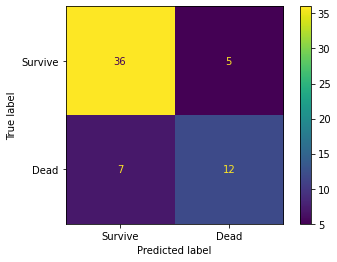

In [9]:
cm = confusion_matrix(y_valid, SVM_OUTPUT)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

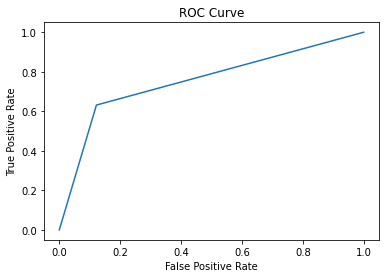

Area Under ROC Curve: 0.7548138639281129
Sensitivity: 0.631578947368421
Specificity: 0.8780487804878049
Accuracy: 0.8


In [10]:
fpr1, tpr1, thresholds = metrics.roc_curve(y_valid, SVM_OUTPUT, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
svm_d=plt.plot(tpr1,fpr1)
plt.show() 
# Print AUC
auc = np.trapz(fpr1,tpr1)
print('Area Under ROC Curve:', auc)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, SVM_OUTPUT)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

# Random Forest

In [11]:
clf_random=RandomForestClassifier(n_estimators=60)
clf_random.fit(X_train,y_train)
y_pred_random=clf_random.predict(X_test)
print(classification_report(y_valid,y_pred_random))
print(metrics.accuracy_score(y_valid, y_pred_random))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.76      0.84      0.80        19

    accuracy                           0.87        60
   macro avg       0.84      0.86      0.85        60
weighted avg       0.87      0.87      0.87        60

0.8666666666666667


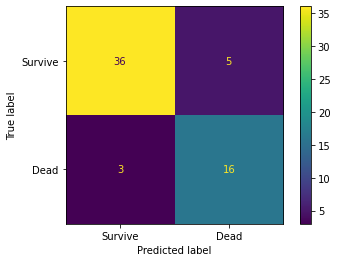

In [12]:
cm = confusion_matrix(y_valid, y_pred_random)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()


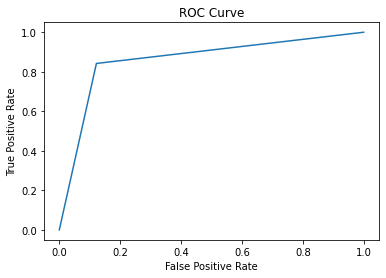

Area Under ROC Curve: 0.8600770218228497
Sensitivity: 0.8421052631578947
Specificity: 0.8780487804878049
Accuracy: 0.8666666666666667


In [13]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_valid, y_pred_random, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
random=plt.plot(tpr2,fpr2)
plt.show() 
# Print AUC
auc = np.trapz(fpr2,tpr2)
print('Area Under ROC Curve:', auc)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_pred_random)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        41
           1       0.75      0.47      0.58        19

    accuracy                           0.78        60
   macro avg       0.77      0.70      0.72        60
weighted avg       0.78      0.78      0.77        60

0.7833333333333333


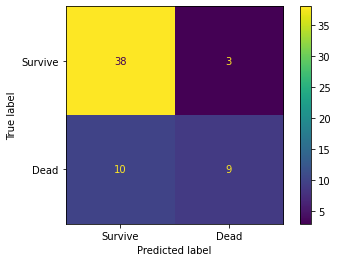

In [14]:
clf_nv=GaussianNB()
clf_nv.fit(X_train,y_train)
y_pred_nv=clf_nv.predict(X_test)
print(classification_report(y_valid,y_pred_nv))
print(metrics.accuracy_score(y_valid, y_pred_nv))
cm = confusion_matrix(y_valid, y_pred_nv)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

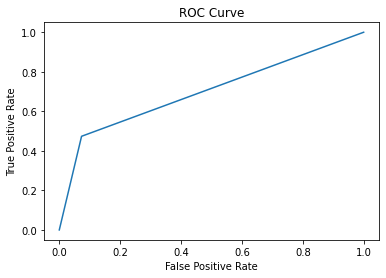

Area Under ROC Curve: 0.7002567394094994
Sensitivity: 0.47368421052631576
Specificity: 0.926829268292683
Accuracy: 0.7833333333333333


In [15]:
fpr3, tpr3, thresholds = metrics.roc_curve(y_valid, y_pred_nv, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr3,fpr3)
plt.show() 
# Print AUC
auc = np.trapz(fpr3,tpr3)
print('Area Under ROC Curve:', auc)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_pred_nv)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

# MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60

0.85


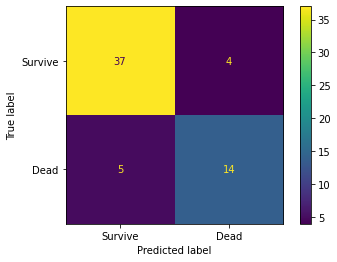

In [16]:
mlpc_model = MLPClassifier(random_state=42)
mlpc_model.fit(X_train, y_train)
mlpc_pred = mlpc_model.predict(X_test)
print("\n",classification_report(y_valid, mlpc_pred))
cm = confusion_matrix(y_valid, mlpc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()
print(metrics.accuracy_score(y_valid, mlpc_pred))

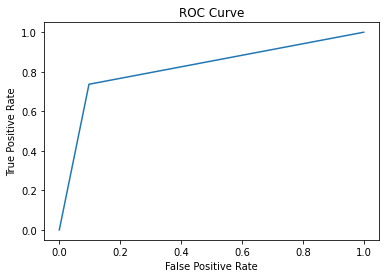

Area Under ROC Curve: 0.819640564826701
Sensitivity: 0.7368421052631579
Specificity: 0.9024390243902439
Accuracy: 0.85


In [17]:

fpr4, tpr4, thresholds = metrics.roc_curve(y_valid, mlpc_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr4,fpr4)
plt.show() 
# Print AUC
auc = np.trapz(fpr4,tpr4)
print('Area Under ROC Curve:', auc)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, mlpc_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

#XGB

In [18]:
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.5, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)
xgb_classifier.fit(X_train, y_train)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search = GridSearchCV(estimator = xgb_classifier,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [19]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

# Predicting the Test set results
y_pred = xgb_classifier.predict(X_test)



               precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.74      0.74      0.74        19

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60

0.8333333333333334


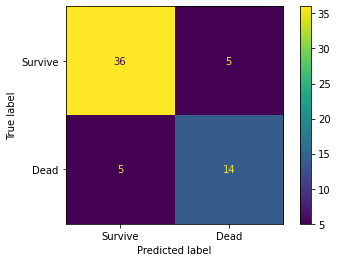

In [20]:
print("\n",classification_report(y_valid, y_pred,))
cm = confusion_matrix(y_valid, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()
print(metrics.accuracy_score(y_valid, y_pred))


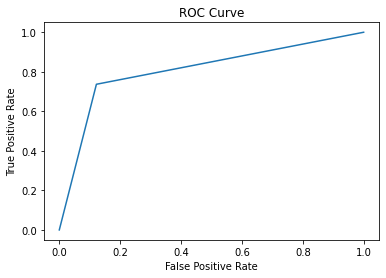

Area Under ROC Curve: 0.8074454428754815


In [21]:
fpr5, tpr5, thresholds = metrics.roc_curve(y_valid, y_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr5,fpr5)
plt.show() 
# Print AUC
auc = np.trapz(fpr5,tpr5)
print('Area Under ROC Curve:', auc)

In [22]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.7368421052631579
Specificity: 0.8780487804878049
Accuracy: 0.8333333333333334


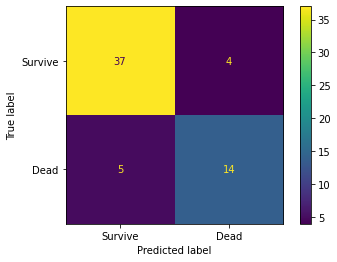

In [23]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

ada_pred = ada_clf.predict(X_test)
cm = confusion_matrix(y_valid, ada_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



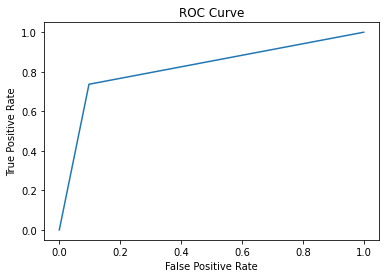

Area Under ROC Curve: 0.819640564826701


In [24]:
print(classification_report(y_valid,ada_pred))
fpr6, tpr6, thresholds = metrics.roc_curve(y_valid, ada_pred, pos_label=0)

# Print ROC curve
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr6,fpr6)
plt.show() 

# Print AUC
auc = np.trapz(fpr6,tpr6)
print('Area Under ROC Curve:', auc)


In [25]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, ada_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.7368421052631579
Specificity: 0.9024390243902439
Accuracy: 0.85


#KNN

In [26]:
print('K Nearest Neighbors')
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_prediction = knn.predict(X_test)
score = metrics.accuracy_score(y_valid,y_prediction)
print(score)

K Nearest Neighbors
0.7333333333333333


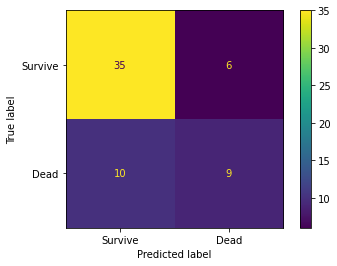

In [27]:
cm = confusion_matrix(y_valid, y_prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

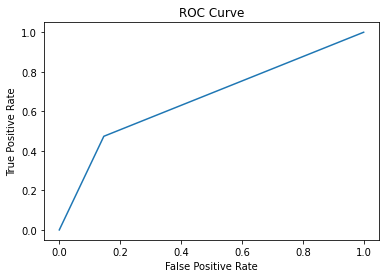

Area Under ROC Curve: 0.6636713735558407


In [28]:
fpr7, tpr7, thresholds = metrics.roc_curve(y_valid, y_prediction, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr7,fpr7)
plt.show() 
# Print AUC
auc = np.trapz(fpr7,tpr7)
print('Area Under ROC Curve:', auc)

In [29]:
print(classification_report(y_valid,y_prediction))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.60      0.47      0.53        19

    accuracy                           0.73        60
   macro avg       0.69      0.66      0.67        60
weighted avg       0.72      0.73      0.72        60



In [30]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, y_prediction)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.47368421052631576
Specificity: 0.8536585365853658
Accuracy: 0.7333333333333333


In [31]:
ada_clf = AdaBoostClassifier(n_estimators=5)
ada_clf.fit(X_train, y_train)

ada_pred = ada_clf.predict(X_test)


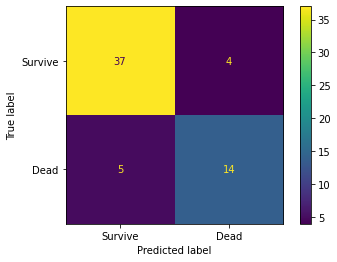

In [32]:
cm = confusion_matrix(y_valid, ada_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Survive','Dead'])
cmd.plot()

In [33]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_valid, ada_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.7368421052631579
Specificity: 0.9024390243902439
Accuracy: 0.85


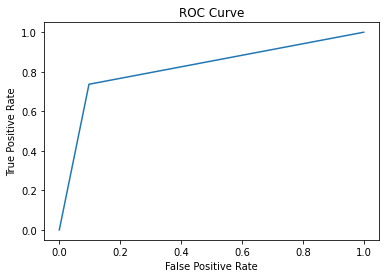

Area Under ROC Curve: 0.819640564826701


In [34]:
fpr5, tpr5, thresholds = metrics.roc_curve(y_valid, ada_pred, pos_label=0)

# Print ROC curve
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr5,fpr5)
plt.show() 

# Print AUC
auc = np.trapz(fpr5,tpr5)
print('Area Under ROC Curve:', auc)

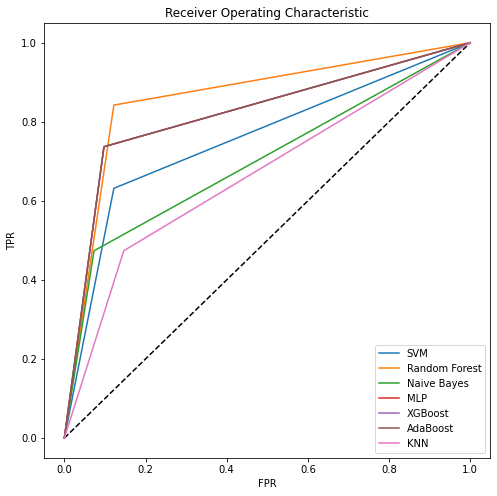

In [35]:
plt.figure(figsize=(8, 8))
plt.plot([0,1],[0,1], 'k--')
plt.plot(tpr1, fpr1, label= "SVM")
plt.plot(tpr2, fpr2, label= "Random Forest")
plt.plot(tpr3, fpr3, label= "Naive Bayes")
plt.plot(tpr4, fpr4, label= "MLP")
plt.plot(tpr5, fpr5, label= "XGBoost")
plt.plot(tpr6, fpr6, label= "AdaBoost")
plt.plot(tpr7, fpr7, label= "KNN")


plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

# Repeat K-fold CV

In [36]:
features=dataset.iloc[:,[0,4,7,11]]
output=dataset['DEATH_EVENT']


In [37]:
rf_model = RandomForestClassifier(max_features=0.5, max_depth=15)
knn_model = KNeighborsClassifier(n_neighbors=6)
dt_model = DecisionTreeClassifier(max_leaf_nodes=10, criterion='entropy')


models = dict()
models['Random Forest'] = rf_model
models['KNN'] = knn_model
models['Decision Tree'] = dt_model



In [38]:
def repeat_cross_validation_accuracy(model, x, y, n_folds = 5, n_repeats = 5, metric = 'accuracy'):
    oof_acc = []
    oof_predictions = []
    for i in range(n_repeats):
        kf = StratifiedKFold(n_folds, shuffle=True)
        acc = cross_val_score(model, x.values, y=y.values,scoring=metric, cv = kf)
        oof_acc.append(acc.mean())
        predictions = cross_val_predict(model, x, y=y.values, cv=kf)
        oof_predictions.append(predictions)
    return oof_acc, oof_predictions 

In [39]:
import time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
import statistics
accuracies = []
training_times = []
REPEATS=10
FOLDS=10
print(f"Fitting models with {REPEATS} iterations of {FOLDS} fold CV\n")
for k in models.keys():
    print(f"####################################\nTraining Model: {k}")
    start = time.time()
    acc, preds = repeat_cross_validation_accuracy(models[k], features, output, n_folds = FOLDS, n_repeats = REPEATS)
    end = time.time()
    elapsed = end - start
    print(f"Total Training Time: {round(elapsed,4)} seconds")
    print(f"Mean OOF Accuracy: {round(statistics.mean(acc)*100, 2)} %")
    
    print(f"####################################\n\n")
    accuracies.append(statistics.mean(acc))
    training_times.append(elapsed)

Fitting models with 10 iterations of 10 fold CV

####################################
Training Model: Random Forest
Total Training Time: 28.9641 seconds
Mean OOF Accuracy: 83.87 %
####################################


####################################
Training Model: KNN
Total Training Time: 0.6346 seconds
Mean OOF Accuracy: 84.41 %
####################################


####################################
Training Model: Decision Tree
Total Training Time: 0.446 seconds
Mean OOF Accuracy: 82.07 %
####################################


